## Prediction of Whether a person will makes over 50K Per Year or Not ! 

#### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Data 

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Adding Column_names to dataset

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [6]:
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


#### Joining train & test Datasets so that preprocessing steps will be easier  when combined.

In [7]:
df = pd.concat([train_set,test_set])

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


#### Data Shape

In [10]:
df.shape

(48842, 15)

#### Data Description

In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### checking for null values in dataset

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

#### Replacing '?' with nan values

In [14]:
df.replace(' ?',np.nan,inplace=True)

In [15]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

#### Checking for Data Types 

In [16]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

## Feature Engineering

#### Workclass

In [17]:
df.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [18]:
df = df.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
df.drop(['native_country'], axis = 1, inplace = True)

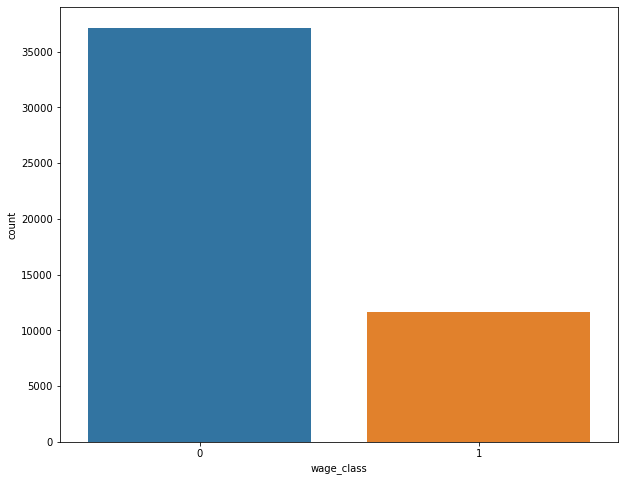

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(df['wage_class'])

In [22]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
df= df.replace(' Without-pay', ' Never-worked')

In [24]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Never-worked'], dtype=object)

In [25]:
df['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

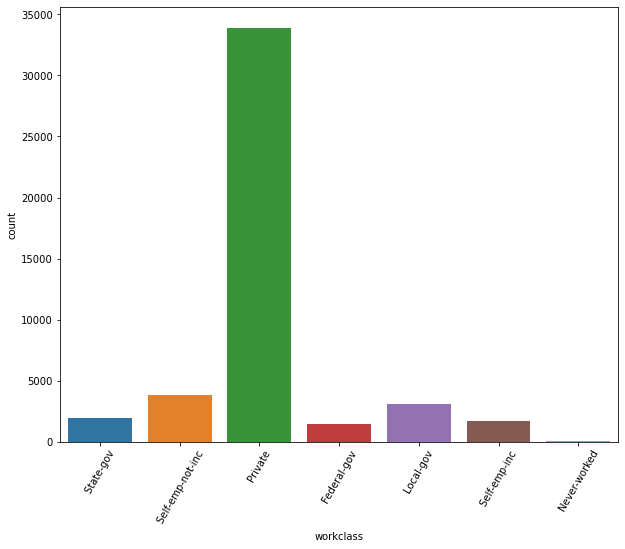

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [27]:
df['workclass'].fillna('0',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

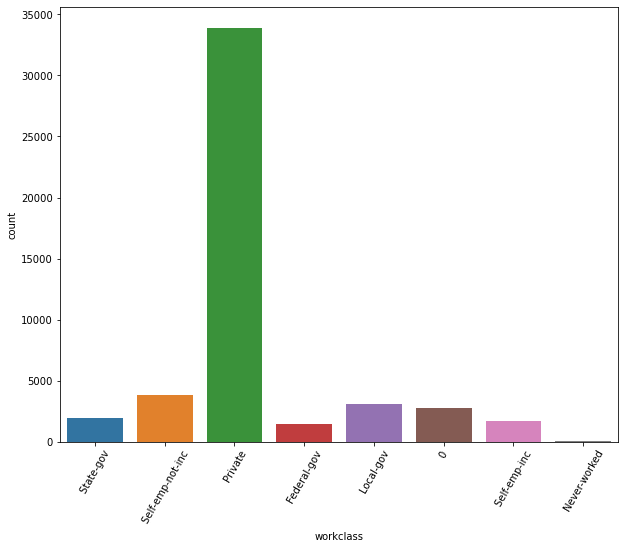

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

#### Fnlgwt

In [29]:
df['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [30]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

In [31]:
df['fnlwgt'].describe()

count    48842.000000
mean        11.982958
std          0.630817
min          9.416216
25%         11.674632
50%         12.090356
75%         12.378525
max         14.214556
Name: fnlwgt, dtype: float64

#### Education

In [32]:
df['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

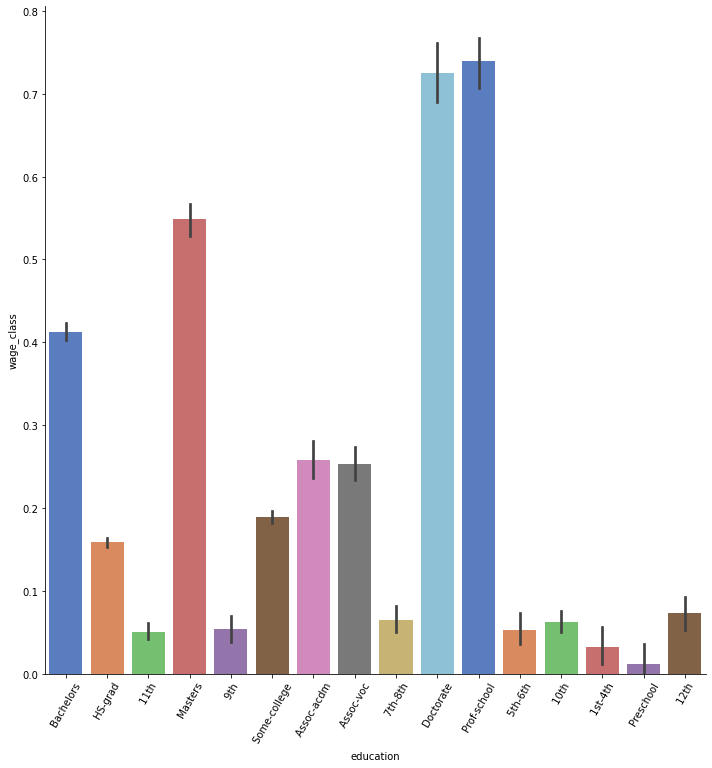

In [34]:
sns.catplot(x='education',y='wage_class',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [35]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [36]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

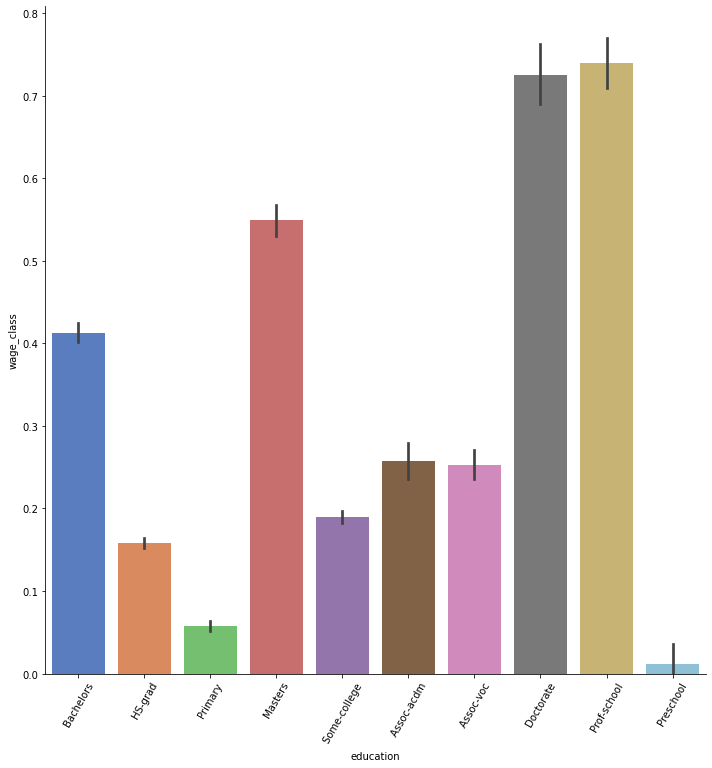

In [37]:
sns.catplot(x='education',y='wage_class',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

#### Marital_status

In [38]:
df['marital_status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

In [39]:
df['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

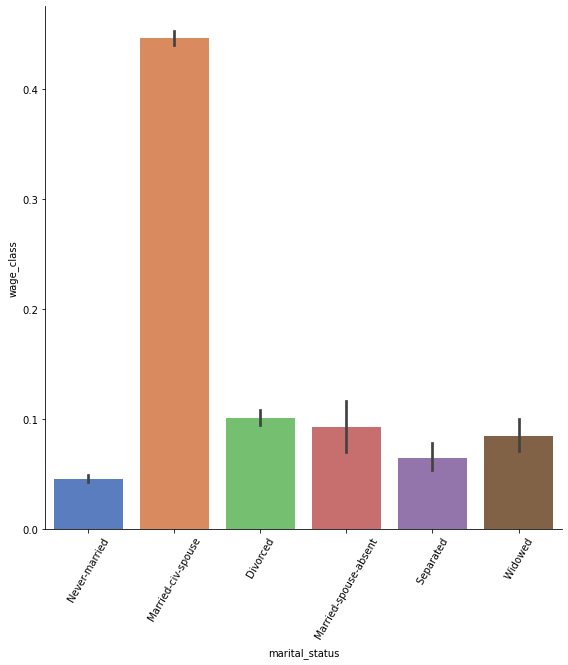

In [40]:
sns.catplot(x='marital_status',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Occupation

In [41]:
df['occupation'].fillna('0',inplace=True)

In [42]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [43]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

In [44]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2824
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

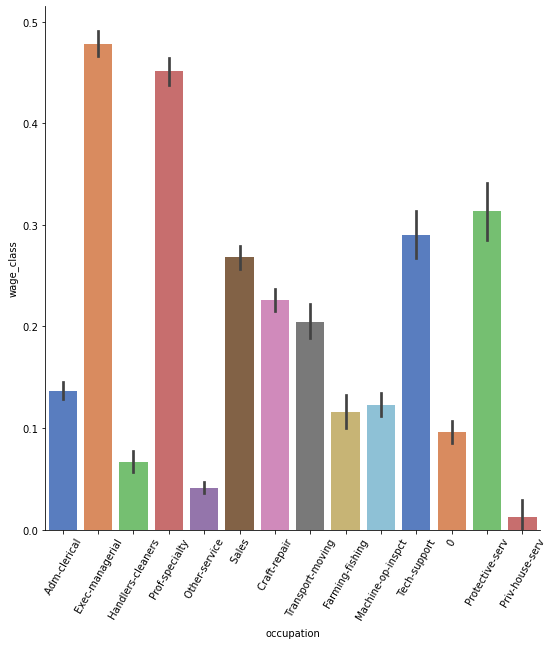

In [45]:
sns.catplot(x='occupation',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Relationship

In [46]:
df['relationship'].value_counts()

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

#### Race

In [47]:
df['race'].value_counts()

 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64

In [48]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class'],
      dtype='object')

#### Sex

In [49]:
df['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

#### Checking Correlations using Heatmap

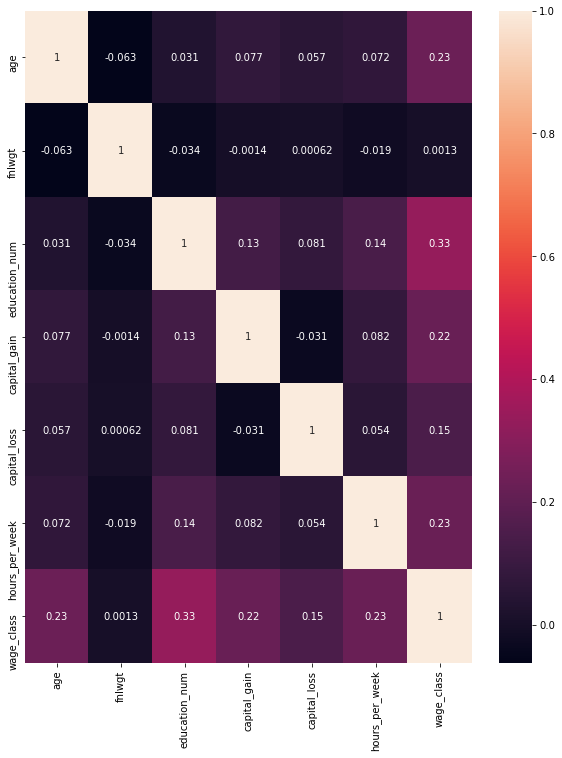

In [50]:
corr = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

#### Converting Categorical values in X to Numerical values 

In [51]:
###  replacing the 0 category to Not defined , as there is no such information
###  regarding the workclass for some people
df['workclass'] = df['workclass'].str.replace ('0','Not defined')

In [52]:
df['workclass'].value_counts()
#df.head()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
Not defined           2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

In [53]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2824
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
Name: occupation, dtype: int64

In [54]:
df['occupation'] = df['occupation'].str.replace ('0','Not defined')

In [55]:
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()

df['sex']= label_encoder.fit_transform(df['sex'])
df['race']= label_encoder.fit_transform(df['race'])
df['education']= label_encoder.fit_transform(df['education']) 
df['workclass']= label_encoder.fit_transform(df['workclass']) 
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
#df['species'].unique()

In [56]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,6,11.258253,2,13,3,0,1,4,1,2174,0,40,0
1,50,5,11.330348,2,13,1,2,0,4,1,0,0,13,0


#### Splitting data into X and y

In [57]:
X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values

#### Scaling X values using Standard Scaler

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Separating to training & testing dataset 

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=101)

In [60]:
x_train.shape

(34189, 13)

In [61]:
y_train.shape

(34189,)

#### Applying XGBoost 

In [62]:
from xgboost import XGBClassifier

XBC = XGBClassifier(learning_rate=0.01,max_depth=10,n_estimators=200)
XBC.fit(x_train,y_train)

C:\Users\lenovo\.conda\envs\python3.6\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:34:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluating Model

In [63]:
XBC.score(x_test,y_test)

0.8626219886712618

In [64]:
y_pred = XBC.predict(x_test)

#### Validation of a model 

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
print("Accuracy score = ", accuracy_score(y_test, y_pred)*100, "%")

Accuracy score =  86.26219886712619 %


In [67]:
confusion_matrix(y_test, y_pred)

array([[10507,   593],
       [ 1420,  2133]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11100
           1       0.78      0.60      0.68      3553

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.80     14653
weighted avg       0.86      0.86      0.86     14653



### Saving a Model 

In [69]:
import pickle

filename = 'final_model_xgboost.pkl'
pickle.dump(XBC, open(filename, 'wb'))